In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings 
import itertools
warnings.filterwarnings('ignore') 

In [434]:
# Parametres 
gamma = float(input("Enter the discount factor=")) #discount rate generally gamma=0.9
num_of_eps = int(input("Enter the iteration no=")) # number of episodes =20 ,as increased more training  
epsilon = float(input("Enter the epsilon value =")) # Epsilon greedy approach , epsilon=0.1
learning_rate=float(input("Enter the alpha value ="))

Enter the discount factor= 0.9
Enter the iteration no= 200
Enter the epsilon value = 0.1
Enter the alpha value = 0.1


In [435]:
# parameters
Num_action = 4  #{up, down, left, right}
num_states = 25 #{5*5 =>No columns*No rows}
reward_table = np.zeros([num_states,Num_action]) 
df_reward=pd.DataFrame(reward_table)
print("Initial reward Table=:\n")
df_reward

Initial reward Table=:



,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


In [436]:
env=np.ones([5,5])
print("initially empty environment=\n",env)
#print(len(env))
for i in range(0,len(env)):
    
    #assign -5 at [0,0] position
    if(i==0):
        for j in range(0,5):
            if(j==0):
                env[i,j]=-5
                #print(int(env[i,j]))
    
    #assign -5 at [3,1] position
    if(i==3):
        for j in range(0,5):
            if(j==1):
                env[i,j]=-5
                
    #assign -5 at [2,3] position
    if(i==2):
        for j in range(0,5):
            if(j==3):
                env[i,j]=-5
                
    #assign +20 at [1,2] position, is a goal state
    if(i==1):
        for j in range(0,5):
            if(j==2):
                env[i,j]=20
                
   # assign -1 everywhere expect position [(0,0),((2,3),(3,2),(1,2)]          
    for j in range(0,5):
            if(env[i,j]==1):
                env[i][j]=-1      
                pass
print("\nActual Environment=\n",env)
df_environment=pd.DataFrame(env)
#df_environment

initially empty environment=
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

Actual Environment=
 [[-5. -1. -1. -1. -1.]
 [-1. -1. 20. -1. -1.]
 [-1. -1. -1. -5. -1.]
 [-1. -5. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]]


In [437]:
for i in range(len(df_environment)):
    goal_val=df_environment.iloc[1,2]
    trap_1_val=df_environment.iloc[0,0]
    trap_2_val=df_environment.iloc[2,3]
    trap_3_val=df_environment.iloc[3,1]
    
print("goal state value =",goal_val)
print("Fisrt trap state value=",trap_1_val)
print("Second trap state value=",trap_2_val)
print("Third trap state value=",trap_3_val)

#locate goal position
for i in range(len(df_environment)):
    for j in range(len(df_environment[i])):
        if (df_environment[i][j]==20):
            goal_pos=[j,i]
print("goal_position=",goal_pos)

# locate trap position
count=1
while (count<=3):
    for i in range(len(df_environment)):
        for j in range(len(df_environment[i])):
            if (df_environment[i][j]==-5):
                trap_pos=[j,i]
                print("trap_position_",count,"=",trap_pos)
                count+=1
         

goal state value = 20.0
Fisrt trap state value= -5.0
Second trap state value= -5.0
Third trap state value= -5.0
goal_position= [1, 2]
trap_position_ 1 = [0, 0]
trap_position_ 2 = [3, 1]
trap_position_ 3 = [2, 3]


In [438]:
goal=[1,2]
trap_1=[0,0]
trap_2=[2,3]
trap_3=[3,1]

In [439]:
# environment's bounds

# Computing the number of rows
rows = len(df_environment.axes[0])

# Computing the number of columns
cols = len(df_environment.axes[1])

row_lb= 0
row_ub=rows-1

col_lb = 0
col_ub = cols-1

print("row_lower_bound=",row_lb)
print("row_upper_bound=",row_ub)
print("col_lower_bound=",col_lb)
print("col_upper_bound=",col_ub)
sleeping = False


row_lower_bound= 0
row_upper_bound= 4
col_lower_bound= 0
col_upper_bound= 4


In [440]:
def highlight_cols(s): 
    if(s==-1):
        color='white'
    elif(s==20):
        color='lightgreen'
    else:
        color='yellow'
    return 'background-color: % s' % color 
  
# highlighting the cells 
display(df_environment.style.applymap(highlight_cols))

,0,1,2,3,4
0,-5.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,-1.000000,-1.000000,20.000000,-1.000000,-1.000000
2,-1.000000,-1.000000,-1.000000,-5.000000,-1.000000
3,-1.000000,-5.000000,-1.000000,-1.000000,-1.000000
4,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [441]:
# scores
scores = []    
number_of_extra_steps = []

# define step function ,if current_pos=(x,y) ,move_left=(x=x,y=y-1),move_right=(x=x,y=y+1),move_up=(x=x-1,y=y),move_down=(x=x+1,y=y)
def step(row_pos,col_pos, action):
    #print("current_row_pos=",row_pos," ","current_col_pos=",col_pos," ","current_action=",action)
    
    if action == 0:
        new_pos = [row_pos, col_pos - 1] # left
    if action == 1:
        new_pos = [row_pos, col_pos + 1] # right
    if action == 2:
        new_pos = [row_pos - 1, col_pos] # up
    if action == 3:
        new_pos = [row_pos + 1, col_pos] # down

    
    # verify action 
    if new_pos[0] <row_lb:     # if current row position is < 0 then come back to (0)
        new_pos[0] = row_lb
       
    if new_pos[0] > row_ub:   # if current row position is > 0 then come back to (4)
        new_pos[0] = row_ub
            
    if new_pos[1] < col_lb:   # if current column position is < 0 then come back to (0)
        new_pos[1] = col_lb
            
    if new_pos[1] > col_ub:   # if current column position is < 0 then come back to (4)
        new_pos[1] = col_ub
     
    # define reward
    reward = env[new_pos[0], new_pos[1]]  # value inside environment matrix as per new_pose which follows action==0/1/2/3 defined above
      
    # define next_state
    next_state = new_pos[0]*5 + new_pos[1]  # new_state=Row_number* no of rows exists + column number  
    return next_state, reward, new_pos
        

In [442]:
# define random action
def random_action():
    return random.choice(range(0,Num_action))   # choose a random action here Num_action=4 {left,right,up,down}

In [443]:
# training loop
for ep in range(1, num_of_eps):

    # print the episode's number
    print("Episode: ", ep)
    
    # redefine environment
    env = np.array([[-5,-1,-1,-1,-1], 
                    [-1,-1,+20,-1,-1], 
                    [-1,-1,-1,-5,-1], 
                    [-1,-5,-1,-1,-1],
                    [-1,-1,-1,-1,-1]])
   
    # choose a position for squarrel
    col_pos = random.choice(range(col_lb,col_ub+1)) 
    row_pos = random.choice(range(row_lb, row_ub+1))
    
    # verify the squarrel's position: it should not be on the nut and predators (danger)
    while ([row_pos, col_pos] == goal) or ([row_pos, col_pos] == trap_1) or ([row_pos, col_pos] == trap_2) or ([row_pos,col_pos] == trap_3):
    
        # choose new positions for the squarrel
        col_pos = random.choice(range(col_lb,col_ub+1)) 
        row_pos = random.choice(range(row_lb, row_ub+1))

        # if the squarrel's position is decent, break the loop
        if (squarrel_pos != goal) and (squarrel_pos != trap_1) and (squarrel_pos !=trap_2) and (squarrel_pos !=trap_3):
            break
            
    squarrel_pos = [row_pos,col_pos]
    
    # find the distance between squarrel and nut
    distance = np.absolute(squarrel_pos[0] - goal[0]) + np.absolute(squarrel_pos[1] - goal[1])
    
    print("Squarrel Position: ", squarrel_pos)
    
    # show squarrel's position
    env[squarrel_pos[0], squarrel_pos[1]] = 0
    
    print("Environment:\n", env, "\n---------------------------------------")
    
    # store rewards
    rewards = [] 
    
    # number of total steps that squarrel has taken
    number_of_steps = 0
    
    # game loop
    while squarrel_pos != goal:
        
        # define state
        state = squarrel_pos[0]*5 + squarrel_pos[1]
        
        # find which number is squarrel on
        if (squarrel_pos == trap_1) or (squarrel_pos == trap_2) or (squarrel_pos == trap_3):
            last_num = -5
            
        if (squarrel_pos != trap_1) and (squarrel_pos != trap_2) and (squarrel_pos != trap_3):
            last_num = -1
        
        # Place back the number that squarrel was blocking
        env[squarrel_pos[0], squarrel_pos[1]] = last_num
        
        # epsilon greedy
        if np.random.uniform() < epsilon:
            action = random_action()
            print("Random Action:")
            
        else:
            # max action in the table
            action = np.argmax(reward_table[state])

        #take action
        next_state, reward, squarrel_pos = step(squarrel_pos[0], squarrel_pos[1], action)
        
        # store rewards
        rewards.append(reward)
        
        # verify squarrel's position (bounds of the environment)
        if squarrel_pos[0] < row_lb:
            squarrel_pos[0] =row_lb
            
        if squarrel_pos[0] > row_ub:
            squarrel_pos[0] = row_ub
            
        if squarrel_pos[1] < col_lb:
            squarrel_pos[1] = col_lb
            
        if squarrel_pos[1] > col_ub:
            squarrel_pos[1] = col_ub
           
        # bellman equation
        reward_table[state][action] = reward + gamma * max(reward_table[next_state])
          
        # show squarrel's position
        env[squarrel_pos[0], squarrel_pos[1]] = 0
        
        # show environment
        print(env)
                
        if sleeping:
            time.sleep(1.2) 
            
        number_of_steps += 1
          
    # calculate the total score for the episode
    total_score = sum(rewards)
    
    scores.append(total_score)
    
    print("Score:", total_score)
    
    # find extra steps
    extra_steps = np.absolute(number_of_steps - distance)
        
    number_of_extra_steps.append(extra_steps)
    
    print("Number of Extra Steps:", extra_steps)
    
# print information about the training
average_score = np.mean(scores)
print("Training Completed. \nAverage Score: {}".format(average_score))

Episode:  1
Squarrel Position:  [0, 2]
Environment:
 [[-5 -1  0 -1 -1]
 [-1 -1 20 -1 -1]
 [-1 -1 -1 -5 -1]
 [-1 -5 -1 -1 -1]
 [-1 -1 -1 -1 -1]] 
---------------------------------------
[[-5  0 -1 -1 -1]
 [-1 -1 20 -1 -1]
 [-1 -1 -1 -5 -1]
 [-1 -5 -1 -1 -1]
 [-1 -1 -1 -1 -1]]
[[ 0 -1 -1 -1 -1]
 [-1 -1 20 -1 -1]
 [-1 -1 -1 -5 -1]
 [-1 -5 -1 -1 -1]
 [-1 -1 -1 -1 -1]]
[[ 0 -1 -1 -1 -1]
 [-1 -1 20 -1 -1]
 [-1 -1 -1 -5 -1]
 [-1 -5 -1 -1 -1]
 [-1 -1 -1 -1 -1]]
[[-5  0 -1 -1 -1]
 [-1 -1 20 -1 -1]
 [-1 -1 -1 -5 -1]
 [-1 -5 -1 -1 -1]
 [-1 -1 -1 -1 -1]]
[[-5 -1  0 -1 -1]
 [-1 -1 20 -1 -1]
 [-1 -1 -1 -5 -1]
 [-1 -5 -1 -1 -1]
 [-1 -1 -1 -1 -1]]
[[-5 -1 -1  0 -1]
 [-1 -1 20 -1 -1]
 [-1 -1 -1 -5 -1]
 [-1 -5 -1 -1 -1]
 [-1 -1 -1 -1 -1]]
[[-5 -1  0 -1 -1]
 [-1 -1 20 -1 -1]
 [-1 -1 -1 -5 -1]
 [-1 -5 -1 -1 -1]
 [-1 -1 -1 -1 -1]]
[[-5 -1  0 -1 -1]
 [-1 -1 20 -1 -1]
 [-1 -1 -1 -5 -1]
 [-1 -5 -1 -1 -1]
 [-1 -1 -1 -1 -1]]
[[-5 -1 -1 -1 -1]
 [-1 -1  0 -1 -1]
 [-1 -1 -1 -5 -1]
 [-1 -5 -1 -1 -1]
 [-1 -1 -1 -1 -

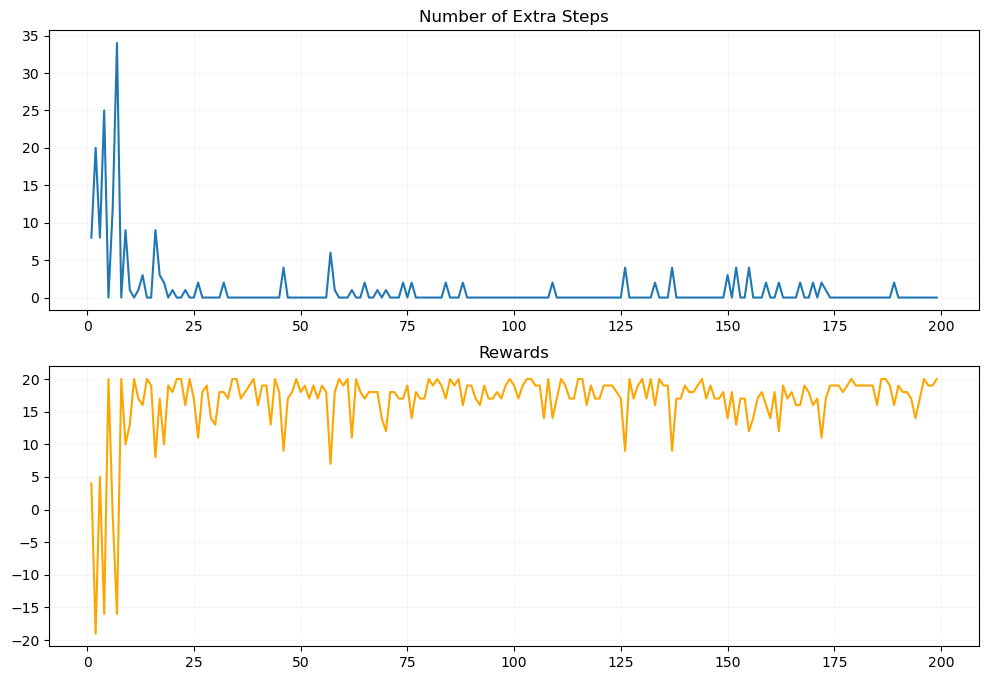

In [444]:
fig, ax = plt.subplots(2,1, figsize = (12,8))

ax[0].plot(range(1, num_of_eps), number_of_extra_steps)
ax[0].set_title("Number of Extra Steps")
ax[0].grid(True, alpha =learning_rate )  # learning_rate=0.1

ax[1].plot(range(1, num_of_eps), scores, c = "orange")
ax[1].set_title("Rewards")
plt.grid(True, alpha = learning_rate)

plt.show()

In [445]:
reward= pd.DataFrame(reward_table)
#reward


In [446]:
#Using itertools.starmap()
import itertools

row_index=[]
for i in range(0,len(reward)):
    row_index.append(str(i))

#printing original list
print("The original list :", row_index)
#initializing append_str
append_str = 'State_'
#Append suffix 
suf_res = np.char.add(append_str,row_index)
#Printing resul
print("list after suffix addition :", suf_res)

The original list : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
list after suffix addition : ['State_0' 'State_1' 'State_2' 'State_3' 'State_4' 'State_5' 'State_6'
 'State_7' 'State_8' 'State_9' 'State_10' 'State_11' 'State_12' 'State_13'
 'State_14' 'State_15' 'State_16' 'State_17' 'State_18' 'State_19'
 'State_20' 'State_21' 'State_22' 'State_23' 'State_24']


In [447]:
# Change the column names
reward.columns =['Action_0=left', 'Action_1=right','Action_2=up','Action_3=down']
# Change the row index names
reward.index = suf_res
reward

,Action_0=left,Action_1=right,Action_2=up,Action_3=down
State_0,-5.0000,14.3000,-5.000,-1.0000
State_1,-5.0000,-1.0000,-1.000,17.0000
State_2,14.3000,-1.0000,-1.000,20.0000
State_3,17.0000,-1.0000,14.300,0.0000
State_4,14.3000,11.8700,-1.000,14.3000
State_5,14.3000,17.0000,-5.900,-1.0000
State_6,-1.9000,20.0000,14.300,14.3000
State_7,0.0000,0.0000,0.000,0.0000
State_8,20.0000,14.3000,14.300,0.0000
State_9,17.0000,-1.0000,-1.000,-1.9000
